Note:- We can use Wine quality dataset and Student Performance Data set as per the discussion in lecture

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../load_data/csv/winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- volatile acidity :   Volatile acidity is the gaseous acids present in wine.
- fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- residual sugar :   Amount of sugar left after fermentation.
- citric acid :    It is weak organic acid, found in citrus fruits naturally.
- chlorides :   Amount of salt present in wine.
- free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide 
- pH :   In wine pH is used for checking acidity
- density 
- sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
- alcohol :   Percent of alcohol present in wine.

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

We can handle the missing data by using some imputation technique, all the techniques are shown below : 

1. **Mean/Mode/Median Imputation**:
   - Advantages:
     - Simple and easy to implement.
     - Preserves the overall distribution of the data.
   - Disadvantages:
     - Can introduce bias, especially if the data is not missing at random.
     - Underestimates the variability in the imputed variable.

2. **Forward Fill/Backward Fill (Carry-Forward/Carry-Back)**:
   - Advantages:
     - Suitable for time-series data or sequential data where missing values are likely to be similar to the previous or next values.
     - Preserves the temporal order of the data.
   - Disadvantages:
     - Might propagate errors if the missing values are not similar to adjacent data points.
     - Not appropriate for datasets without a clear temporal order.

3. **Hot-Deck Imputation**:
   - Advantages:
     - Relatively simple and retains some characteristics of the original data.
     - Can be useful for small datasets with categorical variables.
   - Disadvantages:
     - Limited to categorical data or datasets with a few missing values.
     - Cannot handle continuous or numerical variables effectively.

4. **Regression Imputation**:
   - Advantages:
     - Utilizes relationships between variables, making it more sophisticated than basic imputation methods.
     - Suitable for datasets with complex interdependencies.
   - Disadvantages:
     - Sensitive to outliers and may lead to overfitting if the dataset is not large enough.
     - Can be computationally intensive for large datasets.

5. **K-Nearest Neighbors (KNN) Imputation**:
   - Advantages:
     - Uses the information from similar data points to impute missing values, making it effective for datasets with complex relationships.
     - Can handle both numerical and categorical variables.
   - Disadvantages:
     - Computationally expensive, especially for large datasets.
     - The choice of the K value can significantly impact the imputed values.

6. **Multiple Imputation**:
   - Advantages:
     - Provides a more realistic estimate of uncertainty by creating multiple imputed datasets.
     - Can handle missing data at random (MAR) assumptions more effectively.
   - Disadvantages:
     - Requires multiple imputations, which can be computationally intensive.
     - Difficult to implement and interpret for some users.

7. **Deep Learning-based Imputation**:
   - Advantages:
     - Highly effective for complex datasets with large amounts of missing data.
     - Can capture intricate patterns and dependencies in the data.
   - Disadvantages:
     - Requires significant computational resources, especially for training deep learning models.
     - May suffer from overfitting if the dataset is not large enough.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [17]:
df2 = pd.read_csv("../../load_data/csv/stud.csv")
df2

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [18]:
# Parental_level_of_education, test_preperation_course, race_ethinicity and lunch can be the key factor that affect the performance of student in exam.

In [19]:
df2["avg_score"] = (df2["math_score"] + df2["reading_score"] + df2["writing_score"]) / 3

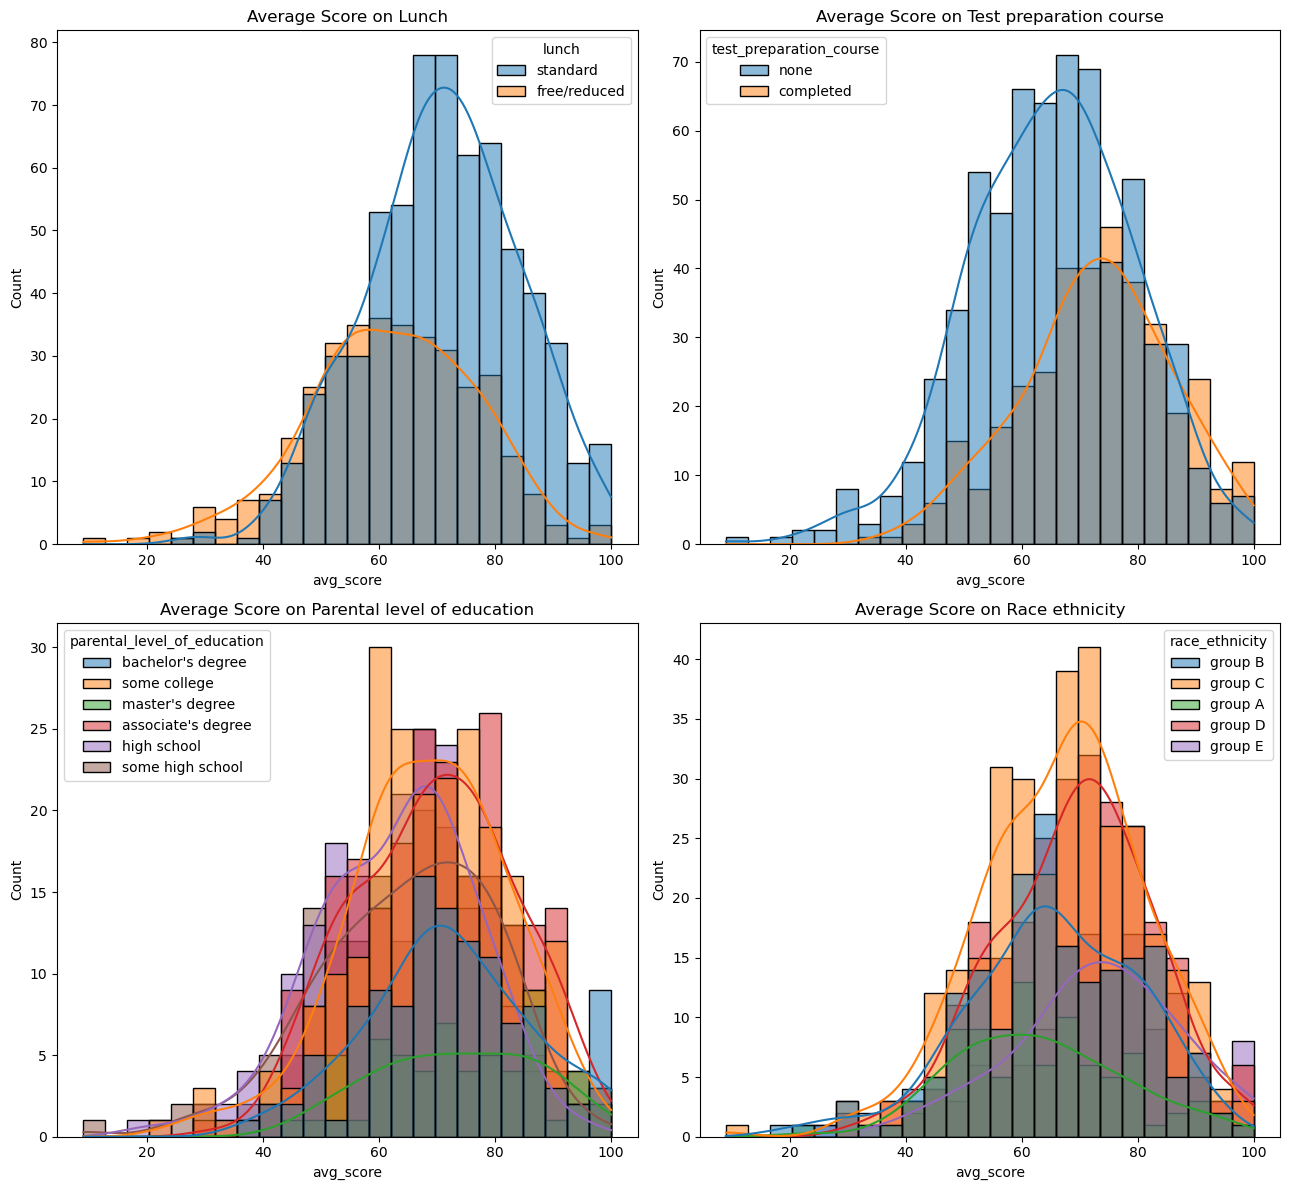

In [67]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,12))

sns.histplot(x=df2["avg_score"],kde=True,hue=df2["lunch"],ax=axes[0,0])
axes[0,0].set_title("Average Score on Lunch")

sns.histplot(x=df2["avg_score"],kde=True,hue=df2["test_preparation_course"],ax=axes[0,1])
axes[0,1].set_title("Average Score on Test preparation course")

sns.histplot(x=df2["avg_score"],kde=True,hue=df2["parental_level_of_education"],ax=axes[1,0])
axes[1,0].set_title("Average Score on Parental level of education")

sns.histplot(x=df2["avg_score"],kde=True,hue=df2["race_ethnicity"],ax=axes[1,1])
axes[1,1].set_title("Average Score on Race ethnicity")

plt.tight_layout()
plt.show()

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [68]:
# We have gender, race_ethnicity, parental_level_of_education, lunch and test_preparation_course as categorical data.
# We can do below things : 
# 1. select gender feature apply nominal encoding
# 2. select race_ethnicity feature apply 
# 3. select parental_level_of_education feature apply ordinal encoding
# 4. select lunch feature apply nominal encoding
# 5. select test_prepatation_course feature apply label encoding

# We have math_score, rading_score, writing_score and avg_score
# On all this feature we can apply standardization or normalization as min-max scaler.

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [75]:
columns = df.columns

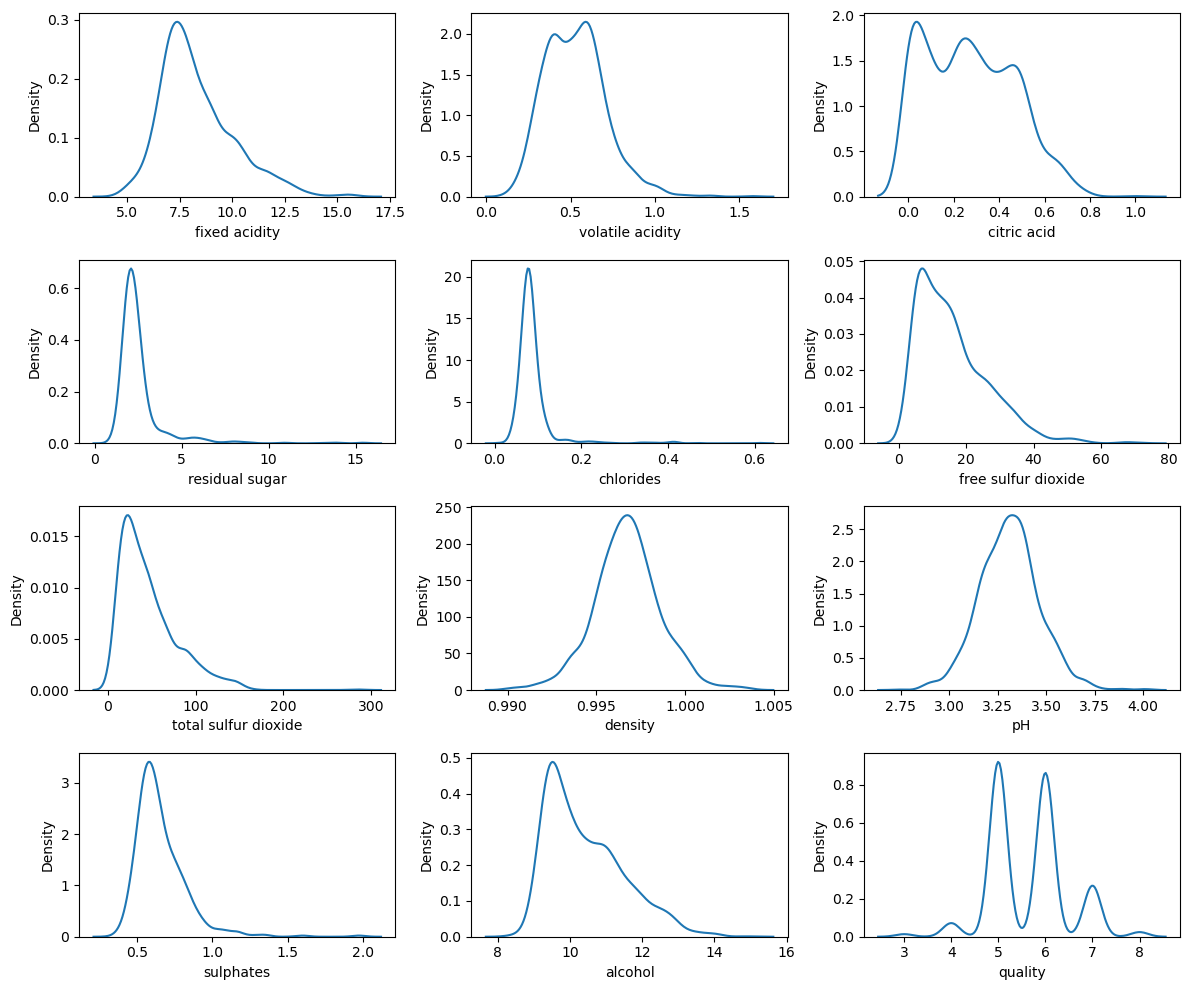

In [84]:
plt.figure(figsize=(12,10))

for i in range(0,len(columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(df[columns[i]])
    plt.tight_layout()

In [90]:
# citric acid, free sulfur dioxide, total sulfur dioxide, alcohol and quality feature follows non-normality.

# Log Transformation: Use the logarithmic transformation (e.g., taking the natural logarithm) to compress large values and expand small values. It is useful when data has a right-skewed distribution.
# Square Root Transformation: Taking the square root of the data can help reduce the impact of extreme values and improve normality.
# Box-Cox Transformation: The Box-Cox transformation is a family of power transformations that includes the log and square root transformations as special cases. It can handle both positive and negative data values.
# Reciprocal Transformation: Taking the reciprocal (1/x) can be useful when data has a left-skewed distribution.
# Exponential Transformation: Raising the data to an exponent can help transform a left-skewed distribution into a more symmetrical one.
# Rank Transformation: Converting the data into ranks can help deal with extreme values and reduce the impact of outliers.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [87]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded the wine quality dataset into a DataFrame called 'df'

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the minimum number of principal components to explain 90% of the variance
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.9) + 1

# Print the result
print(f"The minimum number of principal components to explain 90% of the variance is: {n_components}")


The minimum number of principal components to explain 90% of the variance is: 8
